ROCK PAPER SCISSOR MODEL  

Installing Librarires and Tensor Flow Datasets. 
The Rock Paper Scissor dataset is taken from TensorFlow datasets 

In [ ]:
pip install tensorflow tensorflow-datasets

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

import tensorflow as tf
import tensorflow_datasets as tfds


from tensorflow import keras

Check the TensorFlow version

In [ ]:
tf.__version__

Datasets List in TensorFlow

In [ ]:
tfds.list_builders()   #List of all the datasets in Tensorflow

In [ ]:
builder = tfds.builder('rock_paper_scissors')
info = builder.info

# info --->  Shows the inforamation about the selected dataset

In [ ]:
ds_test = tfds.load(name = 'rock_paper_scissors', split = 'test')
ds_train = tfds.load(name = 'rock_paper_scissors', split = 'train')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/rock_paper_scissors/3.0.0.incomplete6AJVVP/rock_paper_scissors-train.tfrecord


  0%|          | 0/2520 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/rock_paper_scissors/3.0.0.incomplete6AJVVP/rock_paper_scissors-test.tfrecord


  0%|          | 0/372 [00:00<?, ? examples/s]

Dataset rock_paper_scissors downloaded and prepared to /root/tensorflow_datasets/rock_paper_scissors/3.0.0. Subsequent calls will reuse this data.


Examples of Dataset

The old signature is deprecated and will be removed. Please change your call to `tfds.show_examples(ds, info)`


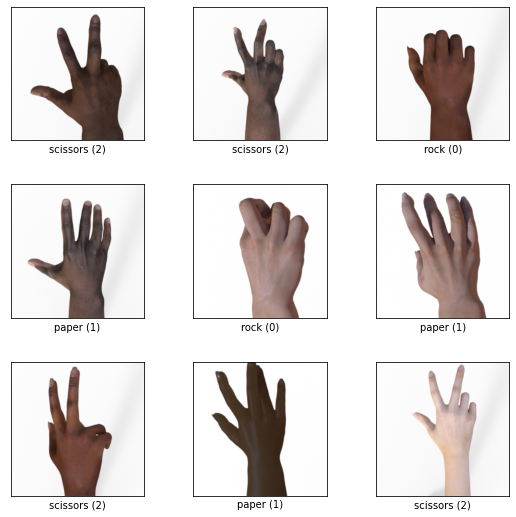

In [ ]:
fig = tfds.show_examples(info, ds_train)

Data Prepration - Converting the images to Gray scale 

In [ ]:
train_images = np.array([i['image'].numpy() [:,:,0] for i in ds_train])          #[:,:,0] this changes to grayscale
train_labels = np.array([i['label'].numpy() for i in ds_train])

test_images = np.array([i['image'].numpy() [:,:,0] for i in ds_test])
test_labels = np.array([i['label'].numpy() for i in ds_test])

categories = ['rock', 'paper', 'scissors']

Checking the size of the images

In [ ]:
# type(train_images[0])
train_images.shape
# train_labels.shape

# test_images.shape 
# test_labels.shape 

(2520, 300, 300)

Resizing and Normalization

In [ ]:
train_images = train_images.reshape(2520,300,300,1) #here the last 1 is to use only grayscale images
test_images = test_images.reshape(372,300,300,1) #only 1 color channel
test_images.shape

# train_images.dtype
# test_images.dtype
                                                    # Normalising DATA
train_images = train_images.astype('float32') #just coverting data to float values
test_images = test_images.astype('float32') 


train_images /= 255                         # because we need values between 0 and 1
test_images /= 255                          # which are currently between 0 - 255

Training a Network without CNN

In [ ]:
model = keras.Sequential([
                          keras.layers.Flatten(),
                          keras.layers.Dense(512, activation='relu'),
                          keras.layers.Dense(256, activation='relu'),
                          keras.layers.Dense(3, activation='softmax')
 ])

model.compile(optimizer='adam',loss=keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=32)


Epoch 1/5
79/79 [==============================] - 3s 27ms/step - loss: 31.3201 - accuracy: 0.3917
Epoch 2/5
79/79 [==============================] - 2s 26ms/step - loss: 1.6143 - accuracy: 0.6004
Epoch 3/5
79/79 [==============================] - 2s 26ms/step - loss: 0.5654 - accuracy: 0.7770
Epoch 4/5
79/79 [==============================] - 2s 26ms/step - loss: 0.4279 - accuracy: 0.8365
Epoch 5/5
79/79 [==============================] - 2s 26ms/step - loss: 0.3887 - accuracy: 0.8528


In [ ]:
model.evaluate(test_images, test_labels)

12/12 [==============================] - 0s 12ms/step - loss: 1.9016 - accuracy: 0.4543


[1.9015519618988037, 0.4543010890483856]

 Training a Network with CNN

In [ ]:
model = keras.Sequential([
                          keras.layers.AveragePooling2D(6, 3),                                                                                                         
                          keras.layers.Conv2D(512, 6, activation='relu', input_shape=(50,50,1)),  
                          # keras.layers.AveragePooling2D(6, 3),                                  
                          keras.layers.Conv2D(256, 6, activation='relu'),
                          keras.layers.MaxPool2D(2,2),
                          keras.layers.Conv2D(64, 3, activation='relu'),
                          keras.layers.Conv2D(32, 3, activation='relu'),
                          keras.layers.MaxPool2D(2, 2),
                          keras.layers.Dropout(0.5),                                              
                          keras.layers.Flatten(),
                          # keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(64, activation='relu'),
                          keras.layers.Dense(32, activation='relu'),
                          keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss = keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=32)

Epoch 1/5
79/79 [==============================] - 158s 2s/step - loss: 0.8967 - accuracy: 0.5373
Epoch 2/5
79/79 [==============================] - 158s 2s/step - loss: 0.1298 - accuracy: 0.9575
Epoch 3/5
79/79 [==============================] - 157s 2s/step - loss: 0.0266 - accuracy: 0.9909
Epoch 4/5
79/79 [==============================] - 158s 2s/step - loss: 0.0290 - accuracy: 0.9893
Epoch 5/5
79/79 [==============================] - 157s 2s/step - loss: 0.0163 - accuracy: 0.9960


In [ ]:
model.evaluate(test_images, test_labels)

12/12 [==============================] - 4s 335ms/step - loss: 1.4207 - accuracy: 0.6882


[1.420702338218689, 0.6881720423698425]

In [ ]:
model = keras.Sequential([
                          keras.layers.AveragePooling2D(6, 3),                                                                                                          
                          keras.layers.Conv2D(512, 6, activation='relu', input_shape=(300,300,1)),  
                          # keras.layers.AveragePooling2D(6, 3),                                
                          keras.layers.Conv2D(256, 6, activation='relu'),
                          keras.layers.MaxPool2D(2,2),
                          keras.layers.Conv2D(64, 3, activation='relu'),
                          keras.layers.Conv2D(32, 3, activation='relu'),
                          keras.layers.MaxPool2D(2, 2),
                          keras.layers.Dropout(0.5),                                              
                          keras.layers.Flatten(),
                          # keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(64, activation='relu'),
                          keras.layers.Dense(32, activation='relu'),
                          keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss = keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=32)

Epoch 1/5
79/79 [==============================] - 158s 2s/step - loss: 0.9613 - accuracy: 0.5016
Epoch 2/5
79/79 [==============================] - 157s 2s/step - loss: 0.1305 - accuracy: 0.9639
Epoch 3/5
79/79 [==============================] - 156s 2s/step - loss: 0.0215 - accuracy: 0.9933
Epoch 4/5
79/79 [==============================] - 156s 2s/step - loss: 0.2176 - accuracy: 0.9127
Epoch 5/5
79/79 [==============================] - 156s 2s/step - loss: 0.0406 - accuracy: 0.9853


In [ ]:
model.evaluate(test_images, test_labels)

12/12 [==============================] - 4s 329ms/step - loss: 1.9077 - accuracy: 0.7473


[1.9077308177947998, 0.7473118305206299]

Prediction on Images

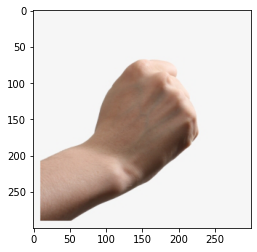

In [ ]:
img2 = imageio.imread('https://s.pngkit.com/png/small/2-25620_rock-paper-scissors-rock-paper-scissors-rock.png')
plt.imshow(img2)

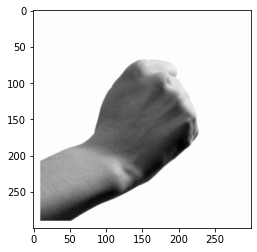

In [ ]:
# gray = cv.imread("img",0)
gray2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
# cv.imshow(gray)
plt.imshow(gray2, cmap='gray')

In [ ]:
imgnp2 = np.asarray(gray2)
imgnp2.shape

(300, 300)

In [ ]:
imgnp2 = imgnp2 / 255
imgnp2 = imgnp2.reshape(1,300,300,1)

In [ ]:
categories[np.argmax(model.predict(imgnp2))]  #Predicting the category

'rock'

In [ ]:
import imageio

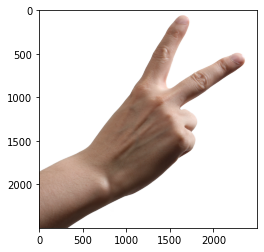

In [ ]:
img3 = imageio.imread('https://upload.wikimedia.org/wikipedia/commons/5/5f/Rock-paper-scissors_%28scissors%29.png')
plt.imshow(img3)

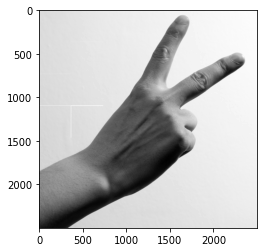

In [ ]:
gray3 = cv.cvtColor(img3, cv.COLOR_BGR2GRAY)
# cv.imshow(gray)
plt.imshow(gray3, cmap='gray')

In [ ]:
imgnp3 = np.asarray(gray2)
imgnp3.shape

(300, 300)